<a href="https://colab.research.google.com/github/kovisoft/colab/blob/master/An_Interesting_Puzzle_Reloaded.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

# An Interesting Puzzle Reloaded
_Sun 26 April 2020, by Tamás Kovács_<br>
</center>


## The puzzle

It was maybe a year ago when I first saw this very interesting puzzle:
<center>

![alt text](http://drive.google.com/uc?export=view&id=10D5podvrv9PUK7QQQveXLlkh908fqwRy)

<!--![alt text](https://qph.fs.quoracdn.net/main-qimg-5b0690e302a38cf2a8068158199e7a21-c)-->
</center>

I immediately tried to solve it by hand (everyone wants to be in the other 5%, right?) but failed miserably. Then I wrote a little program that used brute force method for finding a solution. Of course it failed, too. So finally I gave up and searched the internet for the solution, and found it in [this Quora post by Alon Amit](https://www.quora.com/How-do-you-find-the-positive-integer-solutions-to-frac-x-y+z-+-frac-y-z+x-+-frac-z-x+y-4) with an excellent and very detailed explanation that is worth reading. Looking at the magnitude of the numbers I immediately understood why the brute force method was doomed to fail.

Unfortunately the solution presented in the Quora post is quite complicated and involves advanced math concepts, like elliptic curves and group theory. For example one of the first steps is to find the Weierstrass normal form of the elliptic curve obtained from the puzzle. The solution is then determined by finding a generator of the rational points on the normal form and iterating over the rational points using group addition (described as the 'chords and tangents rule') and finally transformed back to the space of the original elliptic curve. Sounds scary, right? Is it really only 95% of people who cannot solve this or rather is it 99.999995% as Alon Amit estimates in his post? And above all the most important question for me was: _can we do it simpler_?

---

## A simpler solution

I was wondering whether there may be an easier method for solving the puzzle, some process using basic algebra only and not requiring advanced mathematical concepts. An advanced topic in the above solution is finding the Weierstrass normal form. Do we really need this or is it possible to do every action on the original elliptic curve? It turned out that we can completely skip working with the Weierstrass normal form. We can also rephrase the group addition of elliptic curves ('chords and tangents rule') to something less scary looking ('curve and line intersections').<br>
So I came up with this solution that is of course based on the method described in Alon's post:

1.   Eliminate one variable and rearrange the equation, so that it becomes a cubic polynomial equation (elliptic curve).
2.   Find an integer but not necessarily positive solution (point $P$ on the curve). Construct another rational point $Q$, such that the $PQ$ line intersects the curve in a third point.
3.   Determine the third $R$ point where the $PQ$ line intersects the curve and reflect $R$ over the $y=x$ line (i.e. swap the $x$ and $y$ coordinates) to make a new rational point $R'$ on the curve.
4.   Replace $Q$ with $R'$ and repeat step 3 until a positive rational solution is found.
5.   Multiply the coordinates of the resulting point by the denominator to make it an integer solution.

Why does the above work? I think one reason is that our elliptic curve is symmetric, i.e. we can swap x and y and we still have the same curve. Remember that the Weierstrass normal form is symmetric on the $x$-axis and adding two points on the curve involves reflection over the $x$-axis. As our original curve is symmetric on the $y=x$ line, we can do a similar reflection over that line and the reflected point still has rational coordinates.

The basic idea is that if we intersect a cubic polynomial with a line, so that the polinomial and the line have rational coefficients and two of the three intersection points are rational, then the third intersection point is also rational (remember the [Vieta's formulas](https://en.wikipedia.org/wiki/Vieta%27s_formulas)). And we don't actually need to solve cubic equations, because if we already know two intersection points, then the third one can be found by [polynomial long division](https://en.wikipedia.org/wiki/Polynomial_long_division).

I must note here that this method does not necessarily find the **smallest** possible solution. Depending on what initial points we choose, we may get a larger solution set.<b><br>

---
## The solution step by step
Now let's dive into the details and see a step by step explanation of the method:

###1. Eliminate one variable

The original equation in the puzzle is<br><br>
$$\frac{A}{(B+C)}+\frac{B}{(A+C)}+\frac{C}{(A+B)}=4$$<br>
We can see that if we have a rational solution then it can be transformed into an integer solution: just multiply all numbers by their least common multiple. Therefore we can assume that one variable is $1$ and we are looking for rational solutions of this two-variable equation:<br><br>
$$\frac{x}{(y+1)}+\frac{y}{(x+1)}+\frac{1}{(x+y)}=4$$<br>
Multiplying by the denominators introduces new false solutions, we need to remember this and ignore such results where either $x$ or $y$ is $-1$, or $y=-x$:<br><br>
$$x(x+1)(x+y)+y(y+1)(x+y)+(x+1)(y+1)=4(x+1)(y+1)(x+y)$$<br>
Rearranging it gives the equation of a curve that is symmetric on the $y=x$ line (we can swap $x$ and $y$ and get the same equation):<br><br>
$$x^3-3x^2y-3x^2-3xy^2-5xy-3x+y^3-3y^2-3y+1=0$$

###2. Find two rational points on the curve

It's easy to find some integer but not necessarily positive solutions to the original problem using a computer. For example this snippet prints some integer solutions with a positive $z$ value (_please note that although we can use a brute force method to find integer solutions of the original problem, we cannot use the same method to find integer and **positive** solutions, because of the magnitude of such numbers!_):

In [0]:
for x in range(-20,21):
    for y in range(-20,21):
        for z in range(0,21):
            if (x+y)*(x+z)*(y+z) != 0 and x*(x+z)*(x+y) + y*(y+x)*(y+z) + z*(z+x)*(z+y) == 4*(x+y)*(x+z)*(y+z):
                print(x,y,z)

-11 -9 5
-11 -4 1
-9 -11 5
-5 9 11
-5 11 9
-4 -11 1
-1 4 11
-1 11 4
4 -1 11
9 -5 11
11 -5 9
11 -1 4


Pick an integer solution from the above list. For convenience let's take one where $z=1$, like $x=-4, y=-11, z=1$. This is point $P(-4, -11)$ in the rearranged two-variable equation. Construct another solution by permuting $x$, $y$ and $z$, e.g. $x=-11, y=1, z=-4$. Divide by $z$ (remember that $z=1$ in the two-variable equation) and it becomes point $Q(\frac{11}{4}, \frac{-1}{4})$.<br><br>
The main idea here is that we need two points such that both lie on the curve and if we connect them with a line, this line should intersect the curve in a third point that is also a non-degenerate solution to the puzzle. Therefore we cannot simply swap $x$ and $y$ of $P$, because the $PQ$ line would be perpendicular to $y=x$ and would not intersect the curve in a third point.

###3. Determine the third intersection point

If we have a line $y=ax+b$ then we can eliminate variable $y$ from the curve equation. Replacing $y$ with $(ax+b)$ and rearranging it gives us this cubic polynomial:<br><br>
$$(a^3-3a^2-3a+1)x^3+(3a^2b-3a^2-6ab-5a-3b-3)x^2+(3ab^2-6ab-3a-3b^2-5b-3)x + b^3-3b^2-3b+1=0$$<br>

Connecting points $(x_{1}, y_{1})$ and $(x_{2}, y_{2})$ produces this line equation:<br><br>
$$y=\frac{y_{2}-y_{1}}{x_{2}-x_{1}}(x-x_{1})+y_{1}$$

Evaluating for points $P(-4, -11)$ and $Q(\frac{11}{4}, \frac{-1}{4})$ gives the line equation $y=\frac{43}{27}x-\frac{125}{27}$, so using $a=\frac{43}{27}$ and $b=\frac{125}{27}$ in the cubic equation and multiplying by the denominator results in:<br><br>
$$-20660x^3+12171x^2+274755x-417956=0$$<br>

We have now a cubic equation that we could solve e.g. using Cardano's formula, but it's not really needed because we already know two out of the three roots. Therefore we simply perform long division for each known root: we divide our polynomial by $(x-x_{i})$ where $x_{i}$ is a root. So first divide by $(x+4)$:<br><br>
$$-20660x^2+94811x-104489=0$$<br>

Then divide by $(x-\frac{11}{4})$ and simplify:<br><br>
$$-5165x+9499=0$$<br>
From this linear equation we get $x=\frac{9499}{5165}$, this will be the $x$ coordinate of the third intersection point, and we get the $y$ coordinate by evaluating the line equation at $x$, that is $y=-\frac{8784}{5165}$. This gives us the third intersection point $R(\frac{9499}{5165}, -\frac{8784}{5165})$. Now swap the $x$ and $y$ coordinates and we get our next rational point $R'(-\frac{8784}{5165}, \frac{9499}{5165})$ on the curve.<br><br>
The curve, the line, their three intersection points (red) and the reflection of the third point (green) can be seen on the below image:

<center>

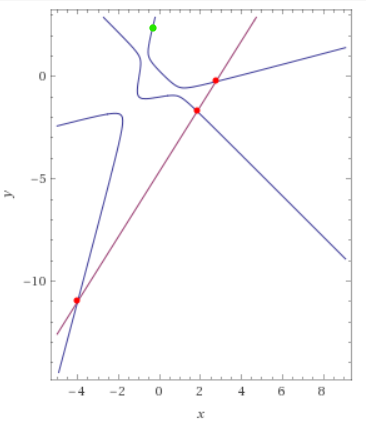

</center>

###4. Iterate over the rational points

Unfortunately the rational point we found in the previous step is not all positive, so we are not yet done. Let's keep our original $P$ but replace $Q$ with $R'$. We have now $P(-4,-11)$ and $Q(-\frac{8784}{5165}, \frac{9499}{5165})$ and again both points lie on the curve and have rational coordinates. Therefore if we connect them with a line and identify the third intersection point, then it will be a rational point, too. We keep iterating until we find a point with positive coordinates. Beware that the number of digits in the denominators is rapidly growing with each iteration, so it's not something to do by hand. It turns out that we need to repeat this process 8 times until we get this point:<br><br>

$$R(\frac{4373612677928697257861252602371390152816537558161613618621437993378423467772036}{36875131794129999827197811565225474825492979968971970996283137471637224634055579}, \frac{154476802108746166441951315019919837485664325669565431700026634898253202035277999}{36875131794129999827197811565225474825492979968971970996283137471637224634055579})$$<br>
All we need to do now is multiply by the denominator (not just these $x$ and $y$ coordinates but also the third value $z=1$) and we get a positive integer solution of the original puzzle:<br><br>
$A=4373612677928697257861252602371390152816537558161613618621437993378423467772036$
$B=154476802108746166441951315019919837485664325669565431700026634898253202035277999$
$C=36875131794129999827197811565225474825492979968971970996283137471637224634055579$
<br><br>

---
## Python implementation
Finally here follows the Python implementation of the above described process. The program does not use any kind of advanced computer algebra system, like Sage. It requires only the Fraction module that provides support for rational number arithmetic.

In [0]:
from fractions import Fraction

def line(x0, y0, x1, y1):
    """
    Make a polynomial that is the equation of the line going through points (x0,y0) and (x1,y1)
    """
    return [(y1-y0)/(x1-x0), y0-(y1-y0)/(x1-x0)*x0]

def intersect_curve(a, b):
    """
    Return a polynomial that is the intersection of the puzzle elliptic curve and the line ax+b:
    (a^3-3a^2-3a+1)*x^3 + (3a^2*b-3a^2-6ab-5a-3b-3)*x^2 + (3ab^2-6ab-3a-3b^2-5b-3)*x + b^3-3b^2-3b+1 = 0
    """
    return [(a*a*a-3*a*a-3*a+1), (3*a*a*b-3*a*a-6*a*b-5*a-3*b-3), (3*a*b*b-6*a*b-3*a-3*b*b-5*b-3), b*b*b-3*b*b-3*b+1]

def evaluate(p, x):
    """
    Evaluate polynomial p for value x
    """
    y = 0
    first = True
    for c in p:
        if first:
            first = False
        else:
            y *= x
        y += c
    return y

def divide(p1, p2):
    """
    Divide two polinomials and return the quotient 
    """
    result = []
    remainder = p1.copy()
    for i in range(len(p1)-len(p2)+1):
        r = remainder[i]/p2[0]
        result.append(r)
        for j in range(len(p2)):
            if i+j >= len(p1):
                break
            remainder[i+j] = remainder[i+j] - r*p2[j]
    return result

# (x1, y1) and (x2, y2) are two rational points on the puzzle elliptic curve
x1 = Fraction(-4,1)
y1 = Fraction(-11,1)
x2 = Fraction(11,4)
y2 = Fraction(-1,4)

while True:
    # make a chord that passes through our two rational points
    chord = line(x1, y1, x2, y2)

    # intersect the elliptic curve by the chord
    # the intersection points are the roots of the intersection polynomial 
    cubic = intersect_curve(chord[0], chord[1])

    # divide the cubic intersection polynomial by (x-x1), where x1 is one root
    # the quotient will be a quadratic polynomial
    quadratic = divide(cubic, [Fraction(1,1), -x1])

    # again divide the quadratic polynomial by (x-x2), where x2 is another root
    # the quotient will be a linear polynomial whose root is the third root
    linear = divide(quadratic, [Fraction(1,1), -x2])

    # the third root identifies the third intersection point of the curve and the chord
    x3 = -linear[1] / linear[0]
    y3 = evaluate(chord, x3)
    if x3 > 0 and y3 > 0:
        break

    # reflect the third intersection point over the y=x line by swapping x and y
    # this will be our next rational point that we use for the next iteration
    x2 = y3
    y2 = x3

a = x3.numerator
b = y3.numerator
c = x3.denominator

print('Solution:')
print('A =', a)
print('B =', b)
print('C =', c)
print('A/(B+C) + B/(A+C) + C/(A+B) =', Fraction(a,b+c) + Fraction(b,a+c) + Fraction(c,a+b))


Solution:
A = 4373612677928697257861252602371390152816537558161613618621437993378423467772036
B = 154476802108746166441951315019919837485664325669565431700026634898253202035277999
C = 36875131794129999827197811565225474825492979968971970996283137471637224634055579
A/(B+C) + B/(A+C) + C/(A+B) = 4
